# Actividad Módulo 31: Ejercicio Series de Tiempo 2
- Importación de datos de Stocks del ejercicio anterior
- Generación de modelo de series de tiempo aplicado a los datos importados usando el modelo de Reversión a la Media y el de Movimiento Browniano
- Modelo autorregresivo y de moving average
- Ejercicio de predicción de modelos 
- Visualización simpole de series de Tiempo

In [2]:
# Importar librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sn

In [3]:
# Librerías para uso estadístico
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import math
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

In [4]:
# Se importa el archivo con datos
import os
os.chdir('D:/Documentos/Documentos/DataAnalysis/ebac/Python/Modulo30/')

df_google = pd.read_csv('GOOG.csv', parse_dates=['Date'], index_col='Date')
df_google

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-01-03,10.523555,10.851077,10.416457,10.840119,10.840119,526815259
2006-01-04,11.056059,11.182087,10.952697,11.089434,11.089434,613747887
2006-01-05,11.108363,11.246595,10.996283,11.238874,11.238874,433952486
2006-01-06,11.379098,11.718576,11.288687,11.598028,11.598028,712938289
2006-01-09,11.616708,11.790805,11.480468,11.628912,11.628912,513593887
...,...,...,...,...,...,...
2017-12-22,53.055500,53.209999,52.972000,53.006001,53.006001,15102000
2017-12-26,52.903500,53.006001,52.509998,52.837002,52.837002,15212000
2017-12-27,52.869499,52.918499,52.402500,52.468498,52.468498,25438000


## Serie Geometric Brownian Motion
- Serie aleatoria utilizada para predecir precios de stocks y movimientos tipo random walk
- https://scipy-cookbook.readthedocs.io/items/BrownianMotion.html

In [5]:
from scipy.stats import norm
import pandas as pd

# Parámetros del proceso
delta = 0.25
dt = 0.1

#Punto inicio
x = 0.0
xini = 0

# Número de iteraciones
n = 10

# Genera los distintos puntos de la serie
for k in range(n):
    x = x + norm.rvs(scale=delta**2*dt)
    print(x)

0.009151291978585035
0.005376296660625556
-0.0029245218717074443
-0.008970285305108478
-0.020575537394574878
-0.01948631039274255
-0.014413414380650387
-0.008901278508771704
-0.007974266132845237
-0.0017580066988555857


In [6]:
# Número de trayectorias
ntra = 10

# Número de iteraciones 
n = 20

# Se pueden guardar los caminos diferenes en un dataframe
res = []
dfres = pd.DataFrame().assign(traj=0, nsample=0, sample=0)
dfres

,traj,nsample,sample


In [7]:
# Genera las trayectorias en un dataframe (dfres)
for i in range(ntra+1):
    for k in range(1,n+1):
        x = x + norm.rvs(scale=delta**2*dt)
        res.append(x)
        df2 = {'traj': i, 'nsample':k, 'sample':x}
        dfres = pd.concat(objs=[dfres, pd.DataFrame(df2, index=[0])], axis=0, ignore_index=True)
        # dfres = dfres.append(df2, ignore_index=True)


# Genera los puntos iniciales en 0
for i in range(ntra+1):
    df2 = {'traj': i, 'nsample':0, 'sample': xini}
    dfres = pd.concat(objs=[dfres, pd.DataFrame(df2, index=[0])], ignore_index=True, axis=0)
    # dfres = dfres.append(df2, ignore_index=True)
dfres

,traj,nsample,sample
0,0,1,-0.001503
1,0,2,-0.009927
2,0,3,-0.015357
3,0,4,-0.015476
4,0,5,-0.014999
...,...,...,...
226,6,0,0.000000
227,7,0,0.000000
228,8,0,0.000000
229,9,0,0.000000


C:\Users\USER\AppData\Local\Temp\ipykernel_10444\1469885987.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=dfres, x='nsample', y='sample', legend=None, ci=None, hue='traj')


<AxesSubplot: xlabel='nsample', ylabel='sample'>

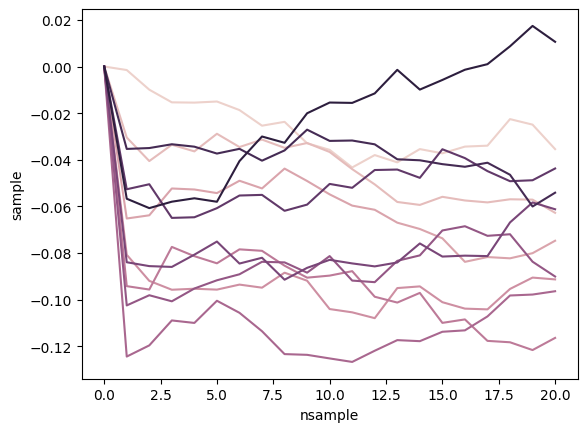

In [8]:
import seaborn as sns
sns.lineplot(data=dfres, x='nsample', y='sample', legend=None, ci=None, hue='traj')

## Serie Reversión a la Media
- Conocido como el modelo Vasicek
- Muy utilizado para predecir tasas de Bancos Centrales, niveles de actividad económicos

In [9]:
def mod_vasicek(r0, K, theta, sigma, T=1, N=10, seed=777):
    np.random.seed(seed)
    dt = T/float(N)
    rates = [r0]
    for i in range(N):
        dr = K*(theta-rates[-1])*dt + sigma*np.random.normal()
        rates.append(rates[-1]+dr)
    return range(N+1), rates

In [10]:
# Parámetros para la serie de tiempo
r0 = 0.1875             # Punto inicial
K = 0.2                 # Velocidad de reversión a la media
theta = 0.04            # Nivel de largo plazo de la variable
sigma = 0.012
T = 10
seed = np.random.randint(100,900)
N = 1000

# Llama a la función Vasicek
x, y = mod_vasicek(r0, K, theta, sigma, T, N, seed)

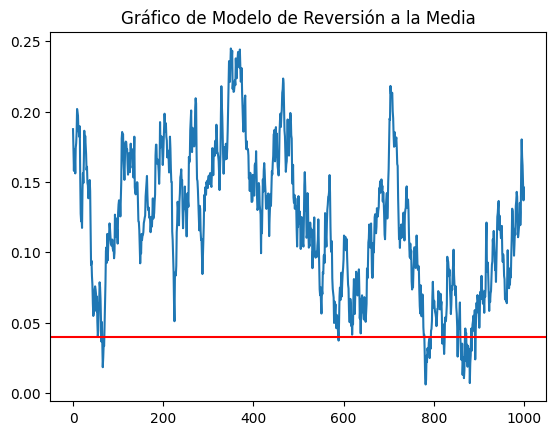

In [11]:
# Generación de gráfica del modelo de Reversión a la Media
plt.plot(x,y)
plt.title('Gráfico de Modelo de Reversión a la Media')
plt.axhline(theta, color='red')
plt.show()

## Serie de Tiempo Autorregresiva (AR)

d:\Programas\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Text(0.5, 1.0, 'Predicción vs Real - Diferencia entre el cierre de un día y el cierre del día anterior')

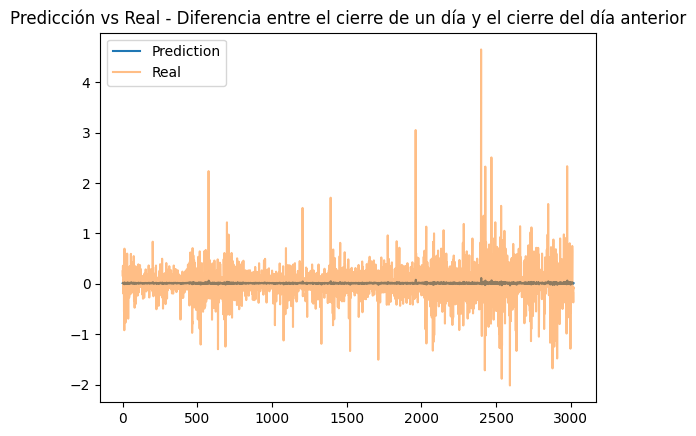

In [12]:
# Predicción de Precio de Google
google_price = ARIMA(df_google['Close'].diff().iloc[1:].values, order=(1,0,0))      # Lo que queremos predecir es la diferencia entre el close de un día y el del anterior
res = google_price.fit()
plt.plot(res.predict())
plt.plot(df_google['Close'].diff().iloc[1:].values, alpha=.5)
plt.legend(['Prediction', 'Real'])
plt.title('Predicción vs Real - Diferencia entre el cierre de un día y el cierre del día anterior')


In [13]:
rmse = math.sqrt(mean_squared_error(df_google['High'].diff().iloc[900:1000].values, res.predict(start=900, end=999)))
print(f'RMSE = {rmse}')

RMSE = 0.13272682167412392


In [14]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3019
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1039.887
Date:                Fri, 13 Oct 2023   AIC                           2085.773
Time:                        20:08:16   BIC                           2103.811
Sample:                             0   HQIC                          2092.259
                               - 3019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0137      0.007      2.092      0.036       0.001       0.027
ar.L1          0.0220      0.013      1.698      0.089      -0.003       0.047
sigma2         0.1166      0.001    115.621      0.000       0.115       0.119
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             43854.65
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               3.28   Skew:                             1.14
Prob(H) (two-sided):                  0.00   Kurtosis:                        21.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Moving Averages Series
- Las series de tipo MA tienen una aproximación para modelar series de tiempo univariadas
- El modelo de promedios móviles especifica que la salida depende linearmente de la prediccón de los términos de error y además un término estocástico no calculable


In [15]:
# Predicciones para el precio de Google
# Lo que se va a predecir son las variaciones absolutas

# Se define la serie ARMA y luego se procede con el model fit
# Order tiene los parámetros p,(d) y q de AR y MA respectivamente
model = ARIMA(df_google['Close'].diff().iloc[1:].values, order=(0,0,5))
result = model.fit()

In [16]:
print(f'μ={result.params[0]:.6} ,  θ={result.params[1]:.6}')
print(result.summary())

μ=0.0137341 ,  θ=0.0208895
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3019
Model:                 ARIMA(0, 0, 5)   Log Likelihood               -1037.477
Date:                Fri, 13 Oct 2023   AIC                           2088.954
Time:                        20:08:17   BIC                           2131.043
Sample:                             0   HQIC                          2104.089
                               - 3019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0137      0.006      2.218      0.027       0.002       0.026
ma.L1          0.0209      0.013      1.564      0.118      -0.005       0.047
ma.L2          0.0070    

In [17]:
rmse = math.sqrt(mean_squared_error(df_google['Close'].diff().iloc[900:1000].values, result.predict(start=900, end=999)))
print(f'RMSE = {rmse}')

RMSE = 0.1408360549581567


Text(0.5, 1.0, 'Predicción vs Real - Diferencia entre el cierre de un día y el cierre del día anterior')

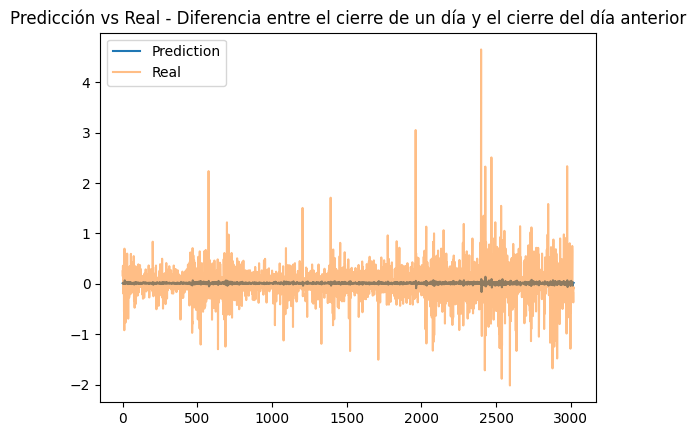

In [18]:
plt.plot(result.predict())
plt.plot(df_google['Close'].diff().iloc[1:].values, alpha=.5)
plt.legend(['Prediction', 'Real'])
plt.title('Predicción vs Real - Diferencia entre el cierre de un día y el cierre del día anterior')